In [1]:
## From: https://towardsdatascience.com/web-scraping-craigslist-a-complete-tutorial-c41cea4f4981

#import get to call a get request on the site
from requests import get

#get the first page of the housing prices
response = get('https://minneapolis.craigslist.org/search/apa?hasPic=1&availabilityMode=0') #get rid of those lame-o's that post a housing option without a pic using their filter

from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

#get the macro-container for the housing posts
posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) #to double check that I got a ResultSet
print( len(posts)) #to double check I got 120 (elements/page)
post = posts[0]

<class 'bs4.element.ResultSet'>
120


In [2]:
curtime = post.find('time',class_='result-date')['datetime']
print(curtime)
cururl = post.find('a',class_='result-title hdrlnk')['href']
print(cururl)

2020-07-06 13:51
https://minneapolis.craigslist.org/ram/apa/d/saint-paul-quiet-top-floor-2-br-free/7154497249.html


In [3]:
#curbrs = post.find('span', class_ = 'housing').text.split()[0][:-2]
#print(curbrs)

#cursqft = post.find('span', class_ = 'housing')
#if cursqft:
#    cursqft = cursqft.text.split()[2][:-3] #cleans the ft2 at the end
#    print(cursqft)
#print(cursqft)

curhood = post.find('span', class_='result-hood') 
if curhood:
    curhood = curhood.text
    print(curhood)



 (St. Paul, Grand Avenue, Mac-Groveland, Tangletown)


In [4]:
from geopy.geocoders import Nominatim, ArcGIS
curmap = BeautifulSoup(get(cururl).text,'html.parser').find_all('div',class_='mapbox')[0]
geolocator = Nominatim(user_agent="darren")

print(curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])

location = geolocator.reverse(query=curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])


geolocator2 = ArcGIS(user_agent="darren")
location2 = geolocator2.reverse(query=curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'],
                                distance=500)





import numpy as np

loc = geolocator.reverse(query=str(np.round(float(curmap.find('div')['data-latitude'])-.001,3))
                   +","
                   +str(np.round(float(curmap.find('div')['data-longitude'])-.001,3)))
    
print(location.address)
print(location2.address)
print(loc.address)

#print(location.raw['address'])
#print(location.raw['address']['city'])
#print(location.raw['address']['neighbourhood'])
#print(location.raw['address']['postcode'])

44.939924,-93.164706
1516, Grand Avenue, St. Paul, Ramsey County, Minnesota, 55105, United States of America
1522 Grand Ave, Saint Paul, Minnesota 55105, USA
1569, West Lincoln Avenue, St. Paul, Ramsey County, Minnesota, 55105, United States of America


In [5]:
curpost = get(post.find('a', class_='result-title hdrlnk')['href']).text
curmap = BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')
print(curmap)

[<div class="mapbox">
<div class="viewposting" data-accuracy="5" data-latitude="44.939924" data-longitude="-93.164706" id="map"></div>
<div class="mapaddress">Grand Avenue near N. Saratoga St.</div>
<p class="mapaddress">
<small>
            (<a href="https://www.google.com/maps/search/44.939924,-93.164706" target="_blank">google map</a>)
        </small>
</p>
</div>]


In [6]:
#new code to put here:
#get list of neighborhoods
#for each neighborhood,
#  get central coordinate
#for each posting
#  calculate distance from neighborhoods' centers
#  assign neighborhood based on nearest neighbor

In [7]:
#linkpfx = 'https://minneapolis.craigslist.org/search/apa?'
#linksfx =( 'sort=date'
#          +'&hasPic=1'
#          +'&bundleDuplicates=1'
#          +'&search_distance=20'
#          +'&postal=55454'
#          +'&min_price=500'
#          +'&max_price=4000'
#          +'&max_bedrooms=3'
#          +'&availabilityMode=0'
#          +'&sale_date=all+dates')
#response = get(linkpfx+linksfx)
#html_soup = BeautifulSoup(response.text, 'html.parser')
#results_num = html_soup.find('div', class_= 'search-legend')
#results_total = int(results_num.find('span', class_='totalcount').text) #pulled the total count of posts as the upper bound of the pages array
#pages = np.arange(0, results_total+1, 120)
#print(results_total)
#print(pages)

#post.find('a', class_='result-title hdrlnk')['href'] in post_links
#post.find('a', class_='result-title hdrlnk')['href'] in 
#apts['URL'].str.contains(post.find('a', class_='result-title hdrlnk')['href']).sum()
#apts['URL'].str.contains('https://minneapolis.craigslist.org/dak/apa/d/burnsville-end-unit-2-bedroom-townhouse/7135839874.html').sum()

In [8]:
#build out the loop
from bs4 import BeautifulSoup
from time import sleep, time
import re
from random import randint #avoid throttling by not sending too many requests one after the other
from warnings import warn
from IPython.core.display import clear_output
import numpy as np


citystr = 'minneapolis' ## 'washingtondc' #'minneapolis'
linkpfx = 'https://'+citystr+'.craigslist.org/search/apa?'
linksfx =( 'sort=date'
          +'&hasPic=1'
          +'&bundleDuplicates=1'
          +'&search_distance=20'
          +'&postal=55454' #55454' #DC: 20009
          +'&min_price=300'
          +'&max_price=8000'
          +'&max_bedrooms=4'
          +'&availabilityMode=0'
          +'&sale_date=all+dates')
response = get(linkpfx+linksfx)
html_soup = BeautifulSoup(response.text, 'html.parser')
results_num = html_soup.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text) #pulled the total count of posts as the upper bound of the pages array
pages = np.arange(0, results_total+1, 120)


from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="derinkuyu",timeout=5)

#
TypeDict = {
    'apartment': 1, 
    'condo':2, 
    'cottage/cabin':3, 
    'duplex':4, 
    'flat':5, 
    'house':6, 
    'in-law':7, 
    'loft':8, 
    'townhouse':9, 
    'manufactured':10, 
    'assisted living':11, 
    'land':12}
LaundryDict = {
    'w/d in unit':1,
    'w/d hookups':2,
    'laundry in bldg':3,
    'laundry on site':4,
    'no laundry on site':5
}    
ParkingDict = {
    'carport':1,
    'attached garage':2,
    'detached garage':3,
    'off-street parking':4,
    'street parking':5,
    'valet parking':6,
    'no parking':7
}

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
bedroom_counts = []
sqfts = []
post_links = []
post_prices = []


cities = []
towns = []
neighborhoods = []
zips = []


types = []
laundries = []
parkings = []

for page in pages:
    
    #get request
    response = get(linkpfx
                   + 's=' #parameter for defining page number
                   + str(page) #page in above array
                   + linksfx)    
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:
        
        curpost = get(post.find('a', class_='result-title hdrlnk')['href']).text
        curmap = BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')
        
        if (post.find('span', class_ = 'result-hood') is not None) and curmap and (
        post.find('a', class_='result-title hdrlnk')['href'] not in post_links):

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            #
            #curpost = get(post_link).text
            curmap = curmap[0] #BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')[0]
            location = geolocator.reverse(curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])
            
            try: 
                cities.append(location.raw['address']['city'])
            except:
                try: 
                    cities.append(location.raw['address']['town'])
                except:
                    cities.append('')
            
            try: 
                towns.append(location.raw['address']['town'])
            except:
                towns.append('')
            
            try:
                neighborhoods.append(location.raw['address']['neighbourhood'])
            except:
                try: 
                    locshift1 = geolocator.reverse( str(float(curmap.find('div')['data-latitude'])+.001)+","+str(float(curmap.find('div')['data-longitude'])+.001))
                    neighborhoods.append(locshift1.raw['address']['neighbourhood'])
                except:                   
                    try: 
                        locshift2 = geolocator.reverse( str(float(curmap.find('div')['data-latitude'])-.001)+","+str(float(curmap.find('div')['data-longitude'])-.001))
                        neighborhoods.append(locshift2.raw['address']['neighbourhood'])
                    except:
                        try:
                            neighborhoods.append(location.raw['address']['town'])
                        except:
                            try:
                                neighborhoods.append(location.raw['address']['city'])
                            except:
                                neighborhoods.append('')
            
            try:
                zips.append(location.raw['address']['postcode'])
            except:
                zips.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                typename = list(set(curattr.text.split('\n')).intersection(list(TypeDict.keys())))[0]
                types.append(TypeDict[typename])
            except:
                types.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                laundryname = list(set(curattr.text.split('\n')).intersection(list(LaundryDict.keys())))[0]
                laundries.append(LaundryDict[laundryname])
            except:
                laundries.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                parkname = list(set(curattr.text.split('\n')).intersection(list(ParkingDict.keys())))[0]
                parkings.append(ParkingDict[parkname])
            except:
                parkings.append('')
            
            #removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
            post_price = int(post.a.text.strip().replace("$", "")) 
            post_prices.append(post_price)
            
            if post.find('span', class_ = 'housing') is not None:
                
                #if the first element is accidentally square footage
                if 'ft2' in post.find('span', class_ = 'housing').text.split()[0]:
                    
                    #make bedroom nan
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                    
                    #make sqft the first element
                    sqft = int(post.find('span', class_ = 'housing').text.split()[0][:-3])
                    sqfts.append(sqft)
                    
                #if the length of the housing details element is more than 2
                elif len(post.find('span', class_ = 'housing').text.split()) > 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = int(post.find('span', class_ = 'housing').text.split()[2][:-3])
                    sqfts.append(sqft)
                    
                #if there is num bedrooms but no sqft
                elif len(post.find('span', class_ = 'housing').text.split()) == 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = np.nan
                    sqfts.append(sqft)                    
                
                else:
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                
                    sqft = np.nan
                    sqfts.append(sqft)
                
            #if none of those conditions catch, make bedroom nan, this won't be needed    
            else:
                bedroom_count = np.nan
                bedroom_counts.append(bedroom_count)
                
                sqft = np.nan
                sqfts.append(sqft)
            
    iterations += 1
    print("Page " + str(iterations) + " scraped successfully!")

print("\n")

print("Scrape complete!")

import pandas as pd

apts = pd.DataFrame({
    'posted': post_timing,
    'neighborhood': post_hoods,
    'post title': post_title_texts,
    'number bedrooms': bedroom_counts,
    'sqft': sqfts,
    'URL': post_links,
    'price': post_prices,
    'cities':cities,
    'towns':towns,
    'neighborhoods':neighborhoods,
    'zips': zips,
    'types':types,
    'parking':parkings,
    'laundry':laundries})
#print(apts.info())
#apts.head(30)
apts.shape

#drop duplicates
apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])

#make the number bedrooms to a float (since np.nan is a float too)
apts['number bedrooms'] = apts['number bedrooms'].apply(lambda x: float(x))

#convert datetime string into datetime object to be able to work with it
from datetime import datetime

apts['posted'] = pd.to_datetime(apts['posted'])

#Looking at what neighborhoods there are with apts['neighborhood'].unique() allowed me to see what
#I needed to deal with in terms of cleaning those.

##remove the parenthesis from the left and right of the neighborhoods
#apts['neighborhood'] = apts['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))
#
##titlecase them
#apts['neighborhood'] = apts['neighborhood'].str.title()
#
##just take the first name of the neighborhood list, splitting on the '/' delimiter
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.split('/')[0])
#
##fix one-offs that
#apts['neighborhood'].replace('Belmont, Ca', 'Belmont', inplace=True)
#apts['neighborhood'].replace('Hercules, Pinole, San Pablo, El Sob', 'Hercules', inplace=True)
#
##remove whitespaces
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.strip())

#save the clean data

apts.to_csv(path_or_buf='./scraped_data/apts_'+citystr+"_"+str(datetime.now()).replace(' ','_').replace(':','-')+'.csv', index=False)
apts.shape


Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!
Page 6 scraped successfully!
Page 7 scraped successfully!
Page 8 scraped successfully!
Page 9 scraped successfully!
Page 10 scraped successfully!
Page 11 scraped successfully!
Page 12 scraped successfully!
Page 13 scraped successfully!
Page 14 scraped successfully!
Page 15 scraped successfully!
Page 16 scraped successfully!
Page 17 scraped successfully!
Page 18 scraped successfully!
Page 19 scraped successfully!
Page 20 scraped successfully!
Page 21 scraped successfully!
Page 22 scraped successfully!
Page 23 scraped successfully!
Page 24 scraped successfully!
Page 25 scraped successfully!
Page 26 scraped successfully!


Scrape complete!


(103, 14)

In [9]:
##drop duplicates
#apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])
#
##make the number bedrooms to a float (since np.nan is a float too)
#apts['number bedrooms'] = apts['number bedrooms'].apply(lambda x: float(x))
#
##convert datetime string into datetime object to be able to work with it
#from datetime import datetime
#
#apts['posted'] = pd.to_datetime(apts['posted'])

#Looking at what neighborhoods there are with apts['neighborhood'].unique() allowed me to see what
#I needed to deal with in terms of cleaning those.

##remove the parenthesis from the left and right of the neighborhoods
#apts['neighborhood'] = apts['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))
#
##titlecase them
#apts['neighborhood'] = apts['neighborhood'].str.title()
#
##just take the first name of the neighborhood list, splitting on the '/' delimiter
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.split('/')[0])
#
##fix one-offs that
#apts['neighborhood'].replace('Belmont, Ca', 'Belmont', inplace=True)
#apts['neighborhood'].replace('Hercules, Pinole, San Pablo, El Sob', 'Hercules', inplace=True)
#
##remove whitespaces
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.strip())

#save the clean data

#apts.to_csv(path_or_buf='./apts_'+str(datetime.now()).replace(' ','_').replace(':','-')+'.csv', index=False)
#apts.shape

In [10]:
import os
import glob
citystr = 'minneapolis' #'minneapolis', 'washingtondc'

aptfiles = glob.glob('./scraped_data/apts_'+citystr+'*')


try:
    del apts
except:
    print('no apts in memory, loading some...')


for file in aptfiles:
    try: 
        apts = apts.append(pd.read_csv(file),ignore_index=True)
    except:
        apts = pd.read_csv(file)
#apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])
apts = apts.drop_duplicates(subset=['price','sqft','number bedrooms','laundry','parking','zips','types','neighborhoods'])
apts = apts[apts['sqft']<5000]
apts = apts[apts['price']>559]

print(str(apts.shape[0])+' unique listings found.')

2444 unique listings found.


In [11]:
from operator import itemgetter
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)
apt = apts.iloc[0]
zipcode = search.by_zipcode(str(apt['zips']))
zipDict = zipcode.to_dict()
NaN = np.nan
if 'medianIncome' not in apts.columns:
    apts['medianIncome'] = NaN
    apts = pd.concat([apts,pd.DataFrame(columns=list(map(itemgetter('x'), zipDict['population_by_age'][2]['values'])))])

print(apts.columns)

Index(['posted', 'neighborhood', 'post title', 'number bedrooms', 'sqft',
       'URL', 'price', 'cities', 'towns', 'neighborhoods', 'zips', 'types',
       'parking', 'laundry', 'medianIncome', 'Under 5', '5-9', '10-14',
       '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85 Plus'],
      dtype='object')


In [12]:

#index = 0
#apt = apts.iloc[index]
#zipcode = search.by_zipcode(str(apt['zips']))
#zipDict = zipcode.to_dict()
#income = np.float(zipDict['median_household_income'])
#popsByAge = np.array(list(map(itemgetter('y'), zipDict['population_by_age'][2]['values'] )) ) / zipDict['population']
#
#apts.loc[index,'medianIncome'] = income
#apts.loc[index,list(map(itemgetter('x'), zipDict['population_by_age'][2]['values']))] = popsByAge
#print(apts.iloc[0])
#
    

    
for index, apt in apts.iterrows():
    zipcode = search.by_zipcode(str(apt['zips']))
    zipDict = zipcode.to_dict()
    income = zipDict['median_household_income']
    if income is not None:
        apts.loc[index,'medianIncome'] = np.float(income)
        
    if zipDict['population_by_age'] is not None:
        popsByAge = list(map(itemgetter('y'), zipDict['population_by_age'][2]['values'] ))
        apts.loc[index,list(map(itemgetter('x'), zipDict['population_by_age'][2]['values']))] = np.array(popsByAge) / zipDict['population']
    

In [13]:
apts['pKids'] = apts[['Under 5', '5-9', '10-14']].sum(axis=1)
apts['pYouths'] = apts[['15-19']].sum(axis=1)
apts['pEarlyTwenties'] = apts[['20-24']].sum(axis=1)
apts['pLateTwenties'] = apts[['25-29']].sum(axis=1)
apts['pThirties'] = apts[['30-34','35-39']].sum(axis=1)
apts['pForties'] = apts[['40-44','45-49']].sum(axis=1)
apts['pFiftyPlus'] = apts[['50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 Plus']].sum(axis=1)

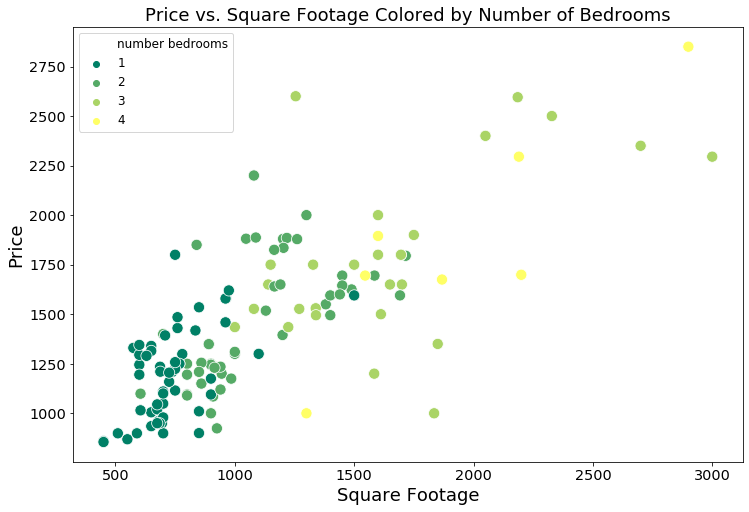

In [14]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sqft', y='price', hue='number bedrooms', palette='summer', x_jitter=True, y_jitter=True, s=125, data=apts.dropna())
plt.legend(fontsize=12)
plt.xlabel("Square Footage", fontsize=18)
plt.ylabel("Price", fontsize=18);
plt.title("Price vs. Square Footage Colored by Number of Bedrooms", fontsize=18);


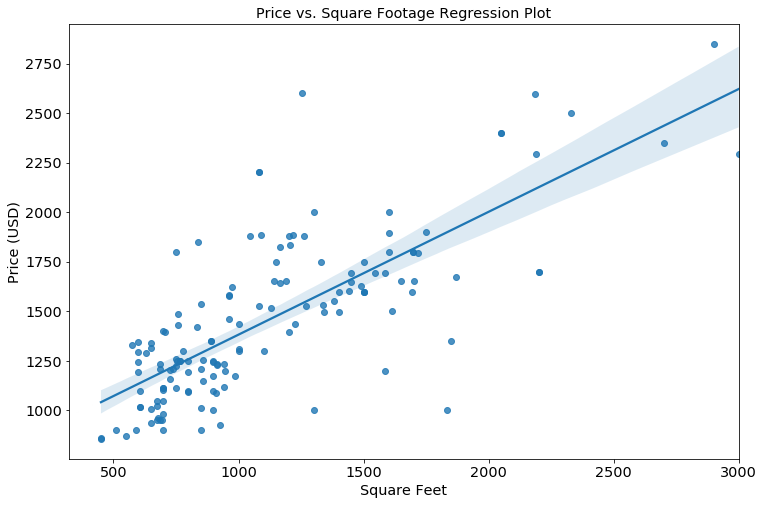

In [15]:
plt.figure(figsize=(12, 8))
sns.regplot(x='sqft', y='price', data=apts.dropna());
plt.title('Price vs. Square Footage Regression Plot');
plt.xlabel("Square Feet");
plt.ylabel("Price (USD)");

In [16]:
apts.corr()

number bedrooms      sqft     price     types   parking  \
number bedrooms         1.000000  0.795119  0.410273  0.459280 -0.000428   
sqft                    0.795119  1.000000  0.553424  0.528246 -0.147929   
price                   0.410273  0.553424  1.000000  0.172544 -0.325056   
types                   0.459280  0.528246  0.172544  1.000000 -0.111488   
parking                -0.000428 -0.147929 -0.325056 -0.111488  1.000000   
laundry                -0.098315 -0.223918 -0.457546 -0.183369  0.569700   
medianIncome            0.066308  0.181170  0.084881  0.167690 -0.159720   
pKids                   0.131525  0.126283 -0.119375  0.159357  0.141133   
pYouths                 0.153396  0.064421 -0.084609  0.142657  0.158115   
pEarlyTwenties          0.012073 -0.087250  0.046647 -0.031648  0.085408   
pLateTwenties          -0.161734 -0.150384  0.154486 -0.151734 -0.053194   
pThirties              -0.091137 -0.070606  0.114326 -0.058425 -0.024725   
pForties                0.040770  0.083594  0.034601  0.105932 -0.010829   
pFiftyPlus             -0.001858  0.044626  0.005381  0.028298 -0.039019   

                  laundry  medianIncome     pKids   pYouths  pEarlyTwenties  \
number bedrooms -0.098315      0.066308  0.131525  0.153396        0.012073   
sqft            -0.223918      0.181170  0.126283  0.064421       -0.087250   
price           -0.457546      0.084881 -0.119375 -0.084609        0.046647   
types           -0.183369      0.167690  0.159357  0.142657       -0.031648   
parking          0.569700     -0.159720  0.141133  0.158115        0.085408   
laundry          1.000000     -0.122299  0.089273  0.053845       -0.043292   
medianIncome    -0.122299      1.000000  0.313968 -0.008331       -0.568689   
pKids            0.089273      0.313968  1.000000  0.492179       -0.027919   
pYouths          0.053845     -0.008331  0.492179  1.000000        0.617523   
pEarlyTwenties  -0.043292     -0.568689 -0.027919  0.617523        1.000000   
pLateTwenties   -0.109476     -0.435608  0.040512 -0.058134        0.486632   
pThirties       -0.100325     -0.160436  0.412931  0.073405        0.310470   
pForties        -0.061939      0.745498  0.784215  0.352325        0.060095   
pFiftyPlus      -0.023359      0.394909  0.608694  0.279876        0.006414   

                 pLateTwenties  pThirties  pForties  pFiftyPlus  
number bedrooms      -0.161734  -0.091137  0.040770   -0.001858  
sqft                 -0.150384  -0.070606  0.083594    0.044626  
price                 0.154486   0.114326  0.034601    0.005381  
types                -0.151734  -0.058425  0.105932    0.028298  
parking              -0.053194  -0.024725 -0.010829   -0.039019  
laundry              -0.109476  -0.100325 -0.061939   -0.023359  
medianIncome         -0.435608  -0.160436  0.745498    0.394909  
pKids                 0.040512   0.412931  0.784215    0.608694  
pYouths              -0.058134   0.073405  0.352325    0.279876  
pEarlyTwenties        0.486632   0.310470  0.060095    0.006414  
pLateTwenties         1.000000   0.879531  0.388885    0.262477  
pThirties             0.879531   1.000000  0.719866    0.527076  
pForties              0.388885   0.719866  1.000000    0.815036  
pFiftyPlus            0.262477   0.527076  0.815036    1.000000

In [17]:
apts[apts['number bedrooms']<=1].groupby('neighborhoods').median()

number bedrooms    sqft   price  types  parking  laundry  \
neighborhoods                                                             
Apple Valley               1.0   846.0  1267.0    1.0      2.0      1.0   
Aquila                     1.0   750.0  1000.0    1.0      3.0      3.0   
Audubon Park               1.0   800.0   890.0    2.0      2.0      3.0   
Avenida                    1.0  1342.0  1772.5    9.0      2.0      1.0   
Bancroft                   1.0   536.0   940.0    1.0      4.0      3.0   
...                        ...     ...     ...    ...      ...      ...   
Whittier                   1.0   550.0  1025.0    1.0      4.0      3.0   
Willow Park                1.0   715.0  1525.0    1.0      2.0      1.0   
Windom                     1.0   650.0   925.0    1.0      3.0      3.0   
Windom Park                1.0  1000.0  1200.0    NaN      NaN      NaN   
Woodbury                   1.0   806.5  1424.5    5.0      2.0      1.0   

               medianIncome     pKids   pYouths  pEarlyTwenties  \
neighborhoods                                                     
Apple Valley        82990.0  0.227095  0.071644        0.049652   
Aquila              63699.0  0.159190  0.042854        0.067027   
Audubon Park        55486.0  0.172401  0.047740        0.063179   
Avenida            102759.0  0.243626  0.077844        0.034343   
Bancroft            47433.0  0.227317  0.058446        0.076371   
...                     ...       ...       ...             ...   
Whittier            43178.0  0.145092  0.037657        0.134118   
Willow Park         63699.0  0.159190  0.042854        0.067027   
Windom              94177.0  0.000000  0.000000        0.000000   
Windom Park         55486.0  0.172401  0.047740        0.063179   
Woodbury            99620.0  0.259517  0.064315        0.041386   

               pLateTwenties  pThirties  pForties  pFiftyPlus  
neighborhoods                                                  
Apple Valley        0.062242   0.142556  0.167400    0.279411  
Aquila              0.124634   0.157827  0.128322    0.320144  
Audubon Park        0.097414   0.179391  0.140506    0.299369  
Avenida             0.048704   0.114736  0.203559    0.277188  
Bancroft            0.112299   0.194451  0.130171    0.200945  
...                      ...        ...       ...         ...  
Whittier            0.196663   0.175843  0.114172    0.168940  
Willow Park         0.124634   0.157827  0.128322    0.320144  
Windom              0.000000   0.000000  0.000000    0.000000  
Windom Park         0.097414   0.179391  0.140506    0.299369  
Woodbury            0.065057   0.152707  0.173268    0.243751  

[104 rows x 14 columns]

In [18]:
#apts[apts['number bedrooms']<=1].groupby('neighborhoods').median()['price'].sort_values()

In [19]:
#apts[apts['number bedrooms']<=brlim]['neighborhoods'].unique()

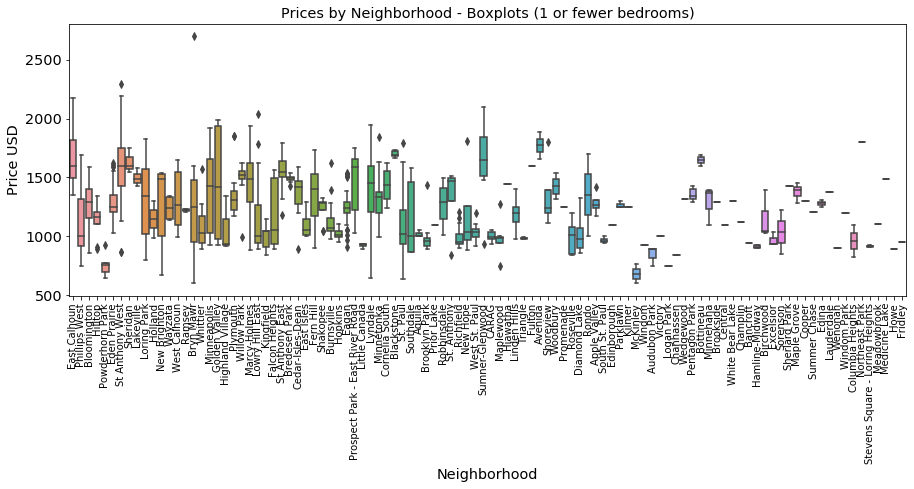

In [20]:
brlim = 1
sns.boxplot(x='neighborhoods', y='price', data=apts[apts['number bedrooms']<=brlim])
            #order=sorted(apts[apts['number bedrooms']<=brlim]['neighborhoods'].unique()))
plt.xlabel("Neighborhood");
plt.xticks(rotation=90,size=10)
plt.ylabel("Price USD");
plt.title("Prices by Neighborhood - Boxplots ("+str(brlim)+" or fewer bedrooms)");

In [21]:
# drop problematic cols
apts = apts.dropna(subset=['price','number bedrooms','sqft','neighborhoods','types','laundry','parking',
                           'medianIncome','pKids','pYouths','pEarlyTwenties','pLateTwenties','pThirties',
                           'pForties','pFiftyPlus'])
print(apts.shape)

# recode neighborhoods
apts_onehot = apts.copy()
apts_onehot = pd.get_dummies(apts_onehot, columns=['cities'], prefix = ['ct'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['neighborhoods'], prefix = ['nb'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['types'], prefix = ['ty'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['laundry'], prefix = ['ld'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['parking'], prefix = ['pk'])
apts_onehot['parking'] = apts['parking']
apts_onehot['laundry'] = apts['laundry']
apts_onehot['cities'] = apts['cities']

#print(apts_onehot)

(1846, 40)


In [22]:
from sklearn import preprocessing
from sklearn import linear_model

maincols = ['number bedrooms','sqft','medianIncome',
            'pKids','pYouths','pEarlyTwenties','pLateTwenties','pThirties','pForties','pFiftyPlus']
#nbcols = [col for col in apts_onehot if col.startswith('ct')]
#for c in nbcols:
#    maincols.append(c) 
nbcols = [col for col in apts_onehot if col.startswith('nb')]
for c in nbcols:
    maincols.append(c) 
tycols = [col for col in apts_onehot if col.startswith('ty')]
for c in tycols:
    maincols.append(c) 
pkcols = [col for col in apts_onehot if col.startswith('pk')]
for c in pkcols:
    maincols.append(c) 
ldcols = [col for col in apts_onehot if col.startswith('ld')]
for c in ldcols:
    maincols.append(c) 

# set up regression
y = apts_onehot['price'].values.reshape(-1,1)
X = apts_onehot[maincols].values
thresh = .5 # drop columns that correlate above this value
cor = np.abs(np.corrcoef(X.T))
p = np.argwhere(np.triu(np.isclose(cor,1),1))
X = np.delete(X,p[:,1],axis=1)
X = preprocessing.scale(X)
print("Number observations: "+str(X.shape[0]))

#OLS
reg = linear_model.LinearRegression()
reg.fit(y=y,X=X)
apts_onehot['price_est'] = np.zeros((apts_onehot.shape[0],1))
apts_onehot['price_est'] = reg.predict(X)
apts_onehot['price_dif'] = apts_onehot['price']-apts_onehot['price_est']
apts_onehot['price_difpct'] = (apts_onehot['price_dif'] / apts_onehot['price_est']) * 100

# Ridge regression approach
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha': [.005, .01, .025, .05, .10, .5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X=X,y=y)
print("Ridge params (best): "+str(ridge_regressor.best_params_))
print("Ridge score (best): "+str(ridge_regressor.best_score_))
apts_onehot['price_est'] = ridge_regressor.predict(X)
apts_onehot['price_dif'] = apts_onehot['price']-apts_onehot['price_est']
apts_onehot['price_difpct'] = (apts_onehot['price_dif'] / apts_onehot['price_est']) * 100


Number observations: 1846
Ridge params (best): {'alpha': 128}
Ridge score (best): -111597.18277722612


In [23]:
#pd.options.display.max_colwidth = 200
#pd.options.display.max_rows = 600
#
#apts_onehot[(apts_onehot['price_difpct']<=10) & 
#            (apts_onehot['sqft']>=699) & 
#            (apts_onehot['price']<=1200) & 
#            (apts_onehot['number bedrooms']<=2)].sort_values('price_difpct',ascending=True)[['URL','price_difpct']] 

In [24]:
#Prepare data:
prices = np.array(apts_onehot['price'])
features = np.array(apts_onehot[maincols])
feature_list = list(apts_onehot[maincols])

In [25]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, prices, test_size = 0.20, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1476, 185)
Training Labels Shape: (1476,)
Testing Features Shape: (370, 185)
Testing Labels Shape: (370,)


In [26]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [27]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error: $', round(np.mean(errors), 2), '.')

Mean Absolute Error: $ 163.04 .


In [28]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.36 %.


In [29]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')


In [30]:
from IPython.display import Image 
Image("tree.png")

In [31]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sqft                 Importance: 0.56
Variable: ld_1.0               Importance: 0.09
Variable: pThirties            Importance: 0.05
Variable: number bedrooms      Importance: 0.04
Variable: pKids                Importance: 0.03
Variable: pYouths              Importance: 0.03
Variable: pLateTwenties        Importance: 0.03
Variable: ty_2.0               Importance: 0.03
Variable: medianIncome         Importance: 0.01
Variable: pEarlyTwenties       Importance: 0.01
Variable: pForties             Importance: 0.01
Variable: pFiftyPlus           Importance: 0.01
Variable: nb_Cedar-Isles-Dean  Importance: 0.01
Variable: nb_East Calhoun      Importance: 0.01
Variable: ty_6.0               Importance: 0.01
Variable: pk_2.0               Importance: 0.01
Variable: nb_Andover           Importance: 0.0
Variable: nb_Anoka             Importance: 0.0
Variable: nb_Apple Valley      Importance: 0.0
Variable: nb_Aquila            Importance: 0.0
Variable: nb_Arden Hills       Importance: 0

In [32]:
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 600

apts_onehot['price_est_rf'] = rf.predict(features)
apts_onehot['price_dif_rf'] = apts_onehot['price']-apts_onehot['price_est_rf']
apts_onehot['price_difpct_rf'] = (apts_onehot['price_dif_rf'] / apts_onehot['price_est_rf']) * 100

apts_onehot[(apts_onehot['price_difpct_rf']<=15) & 
            (apts_onehot['parking'] <=4 ) &
            ((apts_onehot['laundry']==1) | (apts_onehot['laundry']==3) | (apts_onehot['laundry']==4)) & 
            (apts_onehot['sqft']>=599) & 
            (apts_onehot['price']<=1500) & 
            ((apts_onehot['cities']=='Minneapolis') | (apts_onehot['cities']=='Robbinsdale') |
             (apts_onehot['cities']=='Saint Louis Park') | (apts_onehot['cities']=='Richfield') |
             (apts_onehot['cities']=='St. Anthony') | (apts_onehot['cities']=='St. Paul') | 
             (apts_onehot['cities']=='New Brighton') | (apts_onehot['cities']=='Edina')) &
            (apts_onehot.index>=4000)].sort_values('price_difpct_rf',ascending=True)[['posted','URL','price_difpct','price_difpct_rf']] 

posted  \
4161  2020-07-05 15:31:00   
4272  2020-07-05 22:00:00   
4407  2020-07-06 12:57:00   
4020  2020-07-02 13:09:00   
4418  2020-07-06 12:49:00   
4212  2020-07-05 13:12:00   
4115  2020-07-05 10:11:00   
4362  2020-07-06 13:24:00   
4189  2020-07-05 14:21:00   
4045  2020-07-02 12:38:00   
4294  2020-07-05 20:51:00   
4002  2020-07-02 13:16:00   
4169  2020-07-05 15:19:00   
4054  2020-07-05 11:56:00   
4035  2020-07-02 12:45:00   
4396  2020-07-06 13:02:00   
4393  2020-07-06 13:03:00   
4410  2020-07-06 12:53:00   
4414  2020-07-06 12:51:00   
4099  2020-07-05 10:50:00   
4348  2020-07-06 13:35:00   
4302  2020-07-05 20:38:00   

                                                                                                       URL  \
4161        https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-renovated-4-bedroom-2/7153953388.html   
4272   https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-beautiful-spacious-1br-1ba/7154143843.html   
4407   https://minneapolis.craigslist.org/ram/apa/d/saint-paul-great-renovated-one-bedroom/7148885061.html   
4020  https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-3br-1ba-less-than-1-mi-from/7152378007.html   
4418      https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-price-drop-bright-sunny/7144575036.html   
4212         https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-1st-month-free-urban/7153825953.html   
4115   https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-great-2-bedroom-1-bathroom/7143666921.html   
4362  https://minneapolis.craigslist.org/ram/apa/d/saint-paul-affordable-2-br-in-como-park/7147184020.html   
4189  https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-awesome-2br-1baden-in-heart/7153927188.html   
4045   https://minneapolis.craigslist.org/ram/apa/d/saint-paul-elegant-modern-architecture/7151089297.html   
4294    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-nice-uptown-1-br-recently/7142169257.html   
4002      https://minneapolis.craigslist.org/hnp/apa/d/modern-upgrades-hardwood-floors-all/7150735339.html   
4169   https://minneapolis.craigslist.org/hnp/apa/d/den-urban-conveniences-suburban-living/7153969325.html   
4054       https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-special-1st-month-free/7153824563.html   
4035      https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-great-location-shopping/7152341814.html   
4396         https://minneapolis.craigslist.org/ram/apa/d/saint-paul-beautiful-remodeled-2/7138058814.html   
4393       https://minneapolis.craigslist.org/ram/apa/d/saint-paul-2-bedroom-with-hardwood/7139411322.html   
4410    https://minneapolis.craigslist.org/hnp/apa/d/1-bedroom-with-hardwood-floors-in-the/7154432890.html   
4414   https://minneapolis.craigslist.org/ram/apa/d/saint-paul-spacious-and-updated-2br-in/7154449680.html   
4099    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-fall-rental-first-floor-2/7145218764.html   
4348      https://minneapolis.craigslist.org/ram/apa/d/saint-paul-great-location-available/7154484410.html   
4302  https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-longfellow-2-bedroom-duplex/7154117337.html   

      price_difpct  price_difpct_rf  
4161    -28.847643       -18.868071  
4272     -7.057499       -18.713869  
4407     -7.823450       -17.856342  
4020    -24.568539       -13.748102  
4418     -9.449849        -7.742916  
4212    -22.744662        -7.446900  
4115    -22.800333        -6.999341  
4362    -16.147282        -6.593255  
4189    -20.182676        -5.825993  
4045    -16.374048        -4.752710  
4294    -33.636584        -3.662031  
4002    -10.085181        -3.203930  
4169    -13.874776        -1.711892  
4054    -18.229470        -0.995582  
4035     -1.992477        -0.742343  
4396      6.682647         0.200611  
4393      9.107691         0.441087  
4410     -5.284337         0.804760  
4414      3.214584         0.860549  
4099     14.278477         1.820902  
4348     16.291176    